# CDS523 Principle of Data Analytics and Programming Case Study Assignment


## Introduction
Air pollution refers to the contamination of the atmosphere by the pollutants released into the air when industrial and commercial activities are conducted. These pollutants are harmful to human health and the environment. Three major sources of air pollutants in Hong Kong are motor vehicles, marine vessels, and power plants. In this case study, the air quality in Hong Kong on any given day. To achieve our objective, we will write a python program that can automatically fetch data from the Hong Kong government’s data portal and visualize the data into charts.

In [111]:
# Install some python libraries
!pip install matplotlib

In [112]:
import matplotlib.pyplot as plt
import json
import urllib.request
import urllib.parse

In [113]:
def request(url, params={}):
    url_values = urllib.parse.urlencode(params)
    full_url = url + '?' + url_values
    print('Requesting...', full_url)
    with urllib.request.urlopen(full_url) as response:
        the_page = response.read()
    return json.loads(the_page)

In [114]:
date = input('Please enter the date in YYYYMMDD format: ')

print('date is', date)

Please enter the date in YYYYMMDD format: 20211107
date is 20211107


In [115]:
# Step 1: Searching for related resources

current_url = 'https://api.data.gov.hk/v1/historical-archive/list-files'
keyword  = 'Air Quality Health Index of Individual Air Quality Monitoring Stations (City Dashboard Version)'

params = {
    'start': date,
    'end': date,
    'format': 'JSON',
    'search': keyword,
}

json_data = request(current_url, params=params)

# Get the first file
print('There are', json_data['file-count'], 'files')
if json_data['file-count'] > 0:
    file_field = json_data['files'][0]
    api_url = file_field['url']
    print('I found', api_url)

Requesting... https://api.data.gov.hk/v1/historical-archive/list-files?start=20211107&end=20211107&format=JSON&search=Air+Quality+Health+Index+of+Individual+Air+Quality+Monitoring+Stations+%28City+Dashboard+Version%29
There are 1 files
I found https://dashboard.data.gov.hk/api/aqhi-individual?format=json


In [116]:
# Step 2: Searching for related data files in a resource

current_url = 'https://api.data.gov.hk/v1/historical-archive/list-file-versions'
params = {
    'start': date,
    'end': date,
    'url': api_url,
}

json_data = request(current_url, params=params)

print('Version count is', json_data['version-count'])
if json_data['version-count'] > 0:
    timestamp = json_data['timestamps'][0]
    print('I get the timestamp', timestamp)


Requesting... https://api.data.gov.hk/v1/historical-archive/list-file-versions?start=20211107&end=20211107&url=https%3A%2F%2Fdashboard.data.gov.hk%2Fapi%2Faqhi-individual%3Fformat%3Djson
Version count is 23
I get the timestamp 20211107-0000


In [117]:
# Step 3: Retrieving the related data file

current_url = 'https://api.data.gov.hk/v1/historical-archive/get-file'
params = {
    'url': api_url,
    'time': timestamp,
}

json_data = request(current_url, params=params)

print(len(json_data), 'entries found')
if len(json_data) > 0:
    entries = json_data

Requesting... https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fdashboard.data.gov.hk%2Fapi%2Faqhi-individual%3Fformat%3Djson&time=20211107-0000
18 entries found


['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Low', 'Low', 'Low', 'Low', 'Moderate', 'Moderate', 'Moderate']


/tmp/ipykernel_21328/2405132141.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


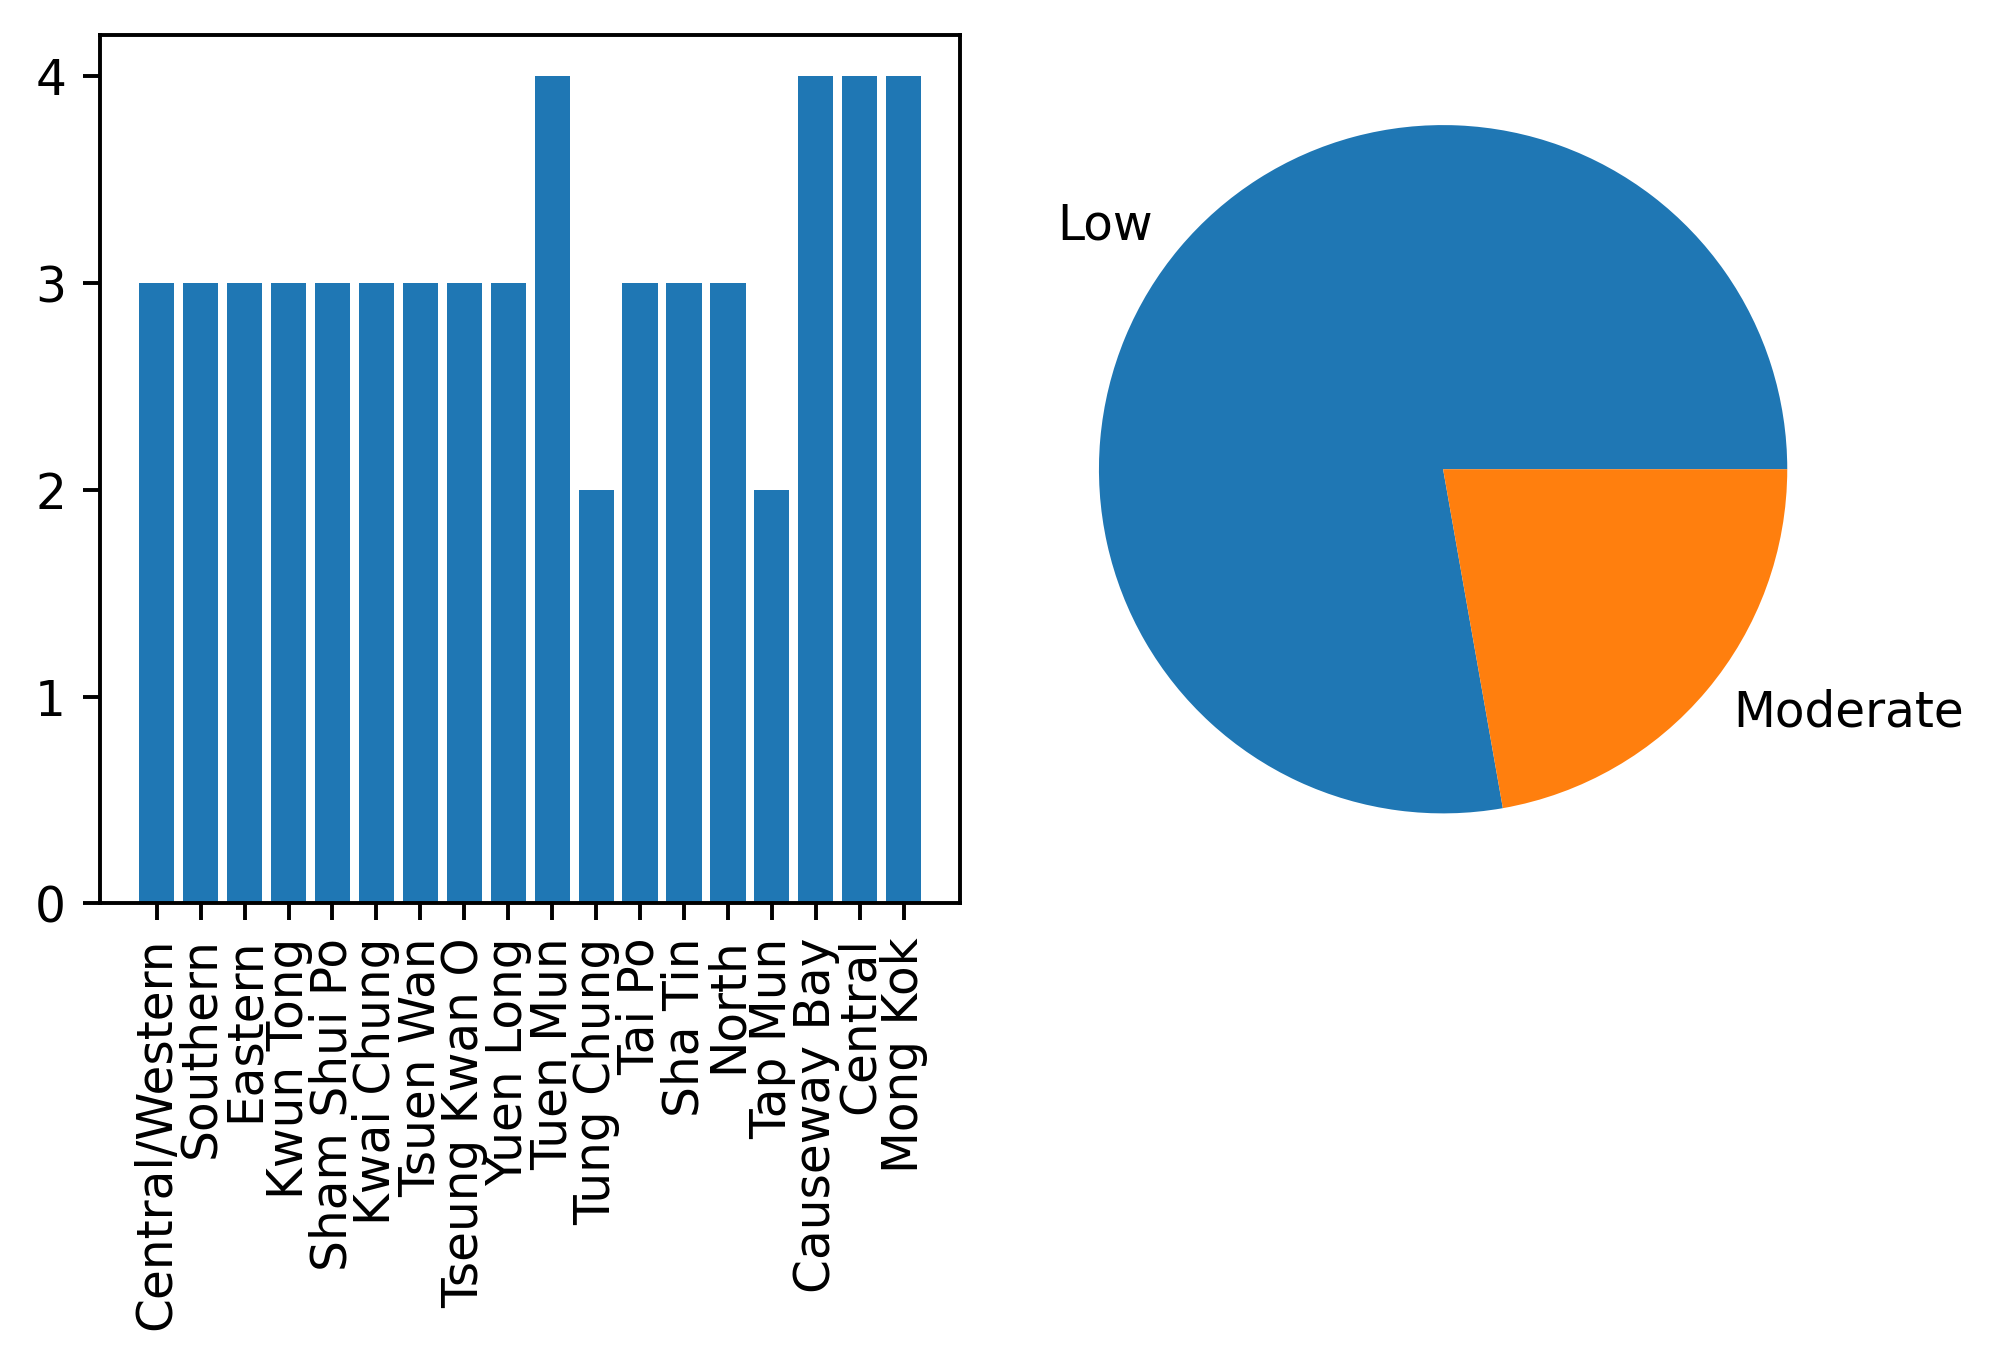

In [119]:
fig = plt.figure(figsize=(6,4), dpi=350)
axs = fig.subplots(1,2)

# --------------------------------------------------
# Split data
# --------------------------------------------------
stations = []
aqhi_values = []
health_risk_values = []
for entry in entries:
    stations.append(entry['station'])
    aqhi_values.append(entry['aqhi'])
    health_risk_values.append(entry['health_risk'])
print(health_risk_values)


# --------------------------------------------------
# Plot bar chart
# --------------------------------------------------
x_pos = range(len((stations)))
axs[0].bar(x_pos, aqhi_values)
#plt.xticks(x_pos, stations, rotation=90)
axs[0].set_xticks(x_pos)
texts = axs[0].set_xticklabels(stations)
for text in texts:
    text.set_rotation(90)

    
# --------------------------------------------------
# Plot pie chart
# --------------------------------------------------
unique_values = set(health_risk_values)
X = []
labels = []

for value in unique_values:
    labels.append(value)
    X.append(health_risk_values.count(value))

axs[1].pie(X, labels=labels)

# --------------------------------------------------

fig.tight_layout()

fig.show()